# **Analysis of "Incidence    Rates of Hospitalisation for Myocarditis and Pericarditis within 30 Days Post-Homologous and Heterologous BNT162b2 Vaccinations among Individuals Younger than 40 Years of Age"**

**Preparation**

Install package epiDisplay

In [1]:
install.packages("epiDisplay")
install.packages("data.table")
install.packages("lubridate")
install.packages("stringr")
install.packages("meta")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘metadat’, ‘numDeriv’, ‘mathjaxr’, ‘pbapply’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘metafor’, ‘lme4’, ‘CompQuadForm’




In [3]:
library(tidyverse)
library(epiDisplay)
library(lubridate)
library(stringr)
library(data.table)
library(foreign)
library(readxl)
library(meta)

Loading 'meta' package (version 6.5-0).
Type 'help(meta)' for a brief overview.
Readers of 'Meta-Analysis with R (Use R!)' should install
older version of 'meta' package: https://tinyurl.com/dt4y5drs


Attaching package: ‘meta’


The following object is masked from ‘package:epiDisplay’:

    ci




# **Table 1**

In [ ]:
temp <- tempfile()
download.file("https://drive.usercontent.google.com/uc?id=1CwoIGKnXXJPbtsORK_qoC0epT7_AcwHj&authuser=0&export=download", temp)
dem<-read_excel(temp)

In [ ]:
dem<-as.data.table(dem)

*   age: age group (5–11,12–17,18–40)
*   m: order of month in cohort

In [ ]:
dem

status,sex,age,month,m,freq
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
infected,Female,5-11,2021-08,M1,8144
infected,Female,5-11,2021-09,M2,5721
infected,Female,5-11,2021-10,M3,5749
infected,Female,12-17,2021-08,M1,11980
infected,Female,12-17,2021-09,M2,9030
infected,Female,12-17,2021-10,M3,9159
infected,Female,18-40,2021-08,M1,99924
infected,Female,18-40,2021-09,M2,46554
infected,Female,18-40,2021-10,M3,30193


**Sex**

In [ ]:
pop<-dem[status=="nonimmunized" & m == "M1"]
pop$age<-factor(pop$age,levels = c("5-11","12-17","18-40"))
pop_total <-pop %>% group_by(status) %>% summarise(total = sum(freq))
pop_sex <-pop %>% group_by(status,sex) %>% summarise(n = sum(freq))
merge(pop_sex,pop_total,by="status",all.x=TRUE) %>% mutate(percent = round(n/total*100,1))

`summarise()` has grouped output by 'status'. You can override using the
`.groups` argument.


status,sex,n,total,percent
<chr>,<chr>,<dbl>,<dbl>,<dbl>
nonimmunized,Female,15944806,32424780,49.2
nonimmunized,Male,16479974,32424780,50.8


In [ ]:
dem<-dem[status != "nonimmunized"]

In [ ]:
dem$age<-factor(dem$age,levels = c("5-11","12-17","18-40"))

In [ ]:
total<- dem %>% group_by(status) %>% summarise(total = sum(freq))

In [ ]:
dem_sex <- dem %>% group_by(status,sex) %>% summarise(n = sum(freq))
merge(dem_sex,total,by="status",all.x = TRUE) %>% mutate(percent = round(n/total*100,1))

`summarise()` has grouped output by 'status'. You can override using the
`.groups` argument.


status,sex,n,total,percent
<chr>,<chr>,<dbl>,<dbl>,<dbl>
infected,Female,226454,446077,50.8
infected,Male,219623,446077,49.2
PZ,Female,3817627,7594965,50.3
PZ,Male,3777338,7594965,49.7
PZ-PZ,Female,3019569,5916836,51.0
PZ-PZ,Male,2897267,5916836,49.0
PZ-PZ-PZ,Female,666404,1113958,59.8
PZ-PZ-PZ,Male,447554,1113958,40.2
SP,Female,1517809,2914643,52.1


**Age**

In [ ]:
pop_age <-pop %>% group_by(status,age) %>% summarise(n = sum(freq))
merge(pop_age,pop_total,by="status",all.x=TRUE) %>% mutate(percent = round(n/total*100,1)) %>% arrange(age)

`summarise()` has grouped output by 'status'. You can override using the
`.groups` argument.


status,age,n,total,percent
<chr>,<fct>,<dbl>,<dbl>,<dbl>
nonimmunized,5-11,5569710,32424780,17.2
nonimmunized,12-17,4849696,32424780,15.0
nonimmunized,18-40,22005374,32424780,67.9


In [ ]:
dem_age <- dem %>% group_by(status,age) %>% summarise(n = sum(freq))
merge(dem_age,total,by="status",all.x = TRUE) %>% mutate(percent = round(n/total*100,1)) %>% arrange(status,age)

`summarise()` has grouped output by 'status'. You can override using the
`.groups` argument.


status,age,n,total,percent
<chr>,<fct>,<dbl>,<dbl>,<dbl>
PZ,5-11,2841445,7594965,37.4
PZ,12-17,3821510,7594965,50.3
PZ,18-40,932010,7594965,12.3
PZ-PZ,5-11,2092560,5916836,35.4
PZ-PZ,12-17,3091247,5916836,52.2
PZ-PZ,18-40,733029,5916836,12.4
PZ-PZ-PZ,5-11,191678,1113958,17.2
PZ-PZ-PZ,12-17,839206,1113958,75.3
PZ-PZ-PZ,18-40,83074,1113958,7.5


# **Table 2**

**Unvaccinated**

Import data

In [ ]:
temp <- tempfile()
download.file("https://drive.usercontent.google.com/uc?id=1wI17hXr5BpIKNiKfNBoo0_uidNtX_CMh&authuser=0&export=download", temp)
unvac<-readRDS(temp)

In [ ]:
glimpse(unvac)

Rows: 222
Columns: 9
$ genid   <chr> "i1", "i2", "i3", "i4", "i5", "i6", "i7", "i8", "i9", "i10", "…
$ myo     <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, F…
$ peri    <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, TRUE, FALSE, FALSE, FALSE, …
$ sex     <chr> "Female", "Male", "Female", "Female", "Female", "Male", "Male"…
$ age_y   <int> 40, 13, 23, 35, 29, 33, 10, 38, 14, 40, 39, 7, 37, 28, 7, 5, 9…
$ age     <fct> 18-40, 12-17, 18-40, 18-40, 18-40, 18-40, 5-11, 18-40, 12-17, …
$ los     <dbl> 3, 14, 7, 6, 14, 60, 7, 16, 1, 42, 4, 17, 2, 11, 4, 17, 17, 14…
$ deathdc <chr> "Alive", "Alive", "Alive", "Alive", "Dead", "Alive", "Alive", …
$ group   <chr> "infected", "infected", "infected", "infected", "infected", "i…


Myocarditis

In [ ]:
tableStack(sex:deathdc,by=group,data=unvac[myo==TRUE])

              infected        reference  Test stat.           P value
Total         18              115                                    
                                                                     
sex                                      Chisq. (1 df) = 1.41 0.236  
   Female     7 (38.9)        62 (53.9)                              
   Male       11 (61.1)       53 (46.1)                              
                                                                     
age_y                                    Ranksum test         0.854  
  median(IQR) 18.5 (9.2,33.5) 16 (11,28)                             
                                                                     
age                                      Chisq. (2 df) = 3.85 0.146  
   5-11       7 (38.9)        31 (27)                                
   12-17      2 (11.1)        39 (33.9)                              
   18-40      9 (50)          45 (39.1)                              
                    

In [ ]:
paste0(round(by(unvac[myo==TRUE]$age_y,unvac[myo==TRUE]$group,mean),1),"±",round(by(unvac[myo==TRUE]$age_y,unvac[myo==TRUE]$group,sd),1))

[1] "21.2±13.2" "19.4±10.9"

Pericarditis

In [ ]:
tableStack(sex:deathdc,by=group,data=unvac[peri==TRUE])

              infected   reference  Test stat.                P value
Total         2          87                                          
                                                                     
sex                                 Fisher's exact test       0.528  
   Female     0 (0)      33 (37.9)                                   
   Male       2 (100)    54 (62.1)                                   
                                                                     
age_y                               Sample too small: group 1        
  mean(SD)    36 (4.2)   26.5 (7.4)                                  
                                                                     
age                                 Fisher's exact test       1      
   5-11       0 (0)      1 (1.1)                                     
   12-17      0 (0)      12 (13.8)                                   
   18-40      2 (100)    74 (85.1)                                   
                    

# **Vaccinated group**

In [ ]:
temp <- tempfile()
download.file("https://drive.google.com/uc?id=1AyL1SfWySwyBmULyphMzN7G-bKiV-WYC&authuser=0&export=download", temp)
vac<-readRDS(temp)

Myocarditis

In [ ]:
tableStack(sex:deathdc,by=group,data=vac[myo==TRUE])

              pz         pz-pz      pz-pz-pz     sp               sp-sp-pz  
Total         61         144        10           2                3         
                                                                            
sex                                                                         
   Female     19 (31.1)  43 (29.9)  3 (30)       1 (50)           2 (66.7)  
   Male       42 (68.9)  101 (70.1) 7 (70)       1 (50)           1 (33.3)  
                                                                            
age_y                                                                       
  median(IQR) 14 (12,15) 14 (12,15) 13.5 (13,16) 22 (21.5,22.5)   19 (19,26)
                                                                            
age                                                                         
   5-11       6 (9.8)    5 (3.5)    0 (0)        0 (0)            0 (0)     
   12-17      53 (86.9)  134 (93.1) 9 (90)       0 (0)            0 (0)     

In [ ]:
round(by(vac[myo==TRUE]$age_y,vac[myo==TRUE]$group,mean),1)

vac[myo == TRUE]$group: pz
[1] 13.8
------------------------------------------------------------ 
vac[myo == TRUE]$group: pz-pz
[1] 14.3
------------------------------------------------------------ 
vac[myo == TRUE]$group: pz-pz-pz
[1] 14.6
------------------------------------------------------------ 
vac[myo == TRUE]$group: sp
[1] 22
------------------------------------------------------------ 
vac[myo == TRUE]$group: sp-sp-pz
[1] 23.7

In [ ]:
round(by(vac[myo==TRUE]$age_y,vac[myo==TRUE]$group,sd),1)

vac[myo == TRUE]$group: pz
[1] 2.7
------------------------------------------------------------ 
vac[myo == TRUE]$group: pz-pz
[1] 3.5
------------------------------------------------------------ 
vac[myo == TRUE]$group: pz-pz-pz
[1] 2.4
------------------------------------------------------------ 
vac[myo == TRUE]$group: sp
[1] 1.4
------------------------------------------------------------ 
vac[myo == TRUE]$group: sp-sp-pz
[1] 8.1

Pericarditis

,Frequency,Percent,Cum. percent
pz,16,32,32
pz-pz,29,58,90
pz-pz-pz,2,4,94
sp,1,2,96
sp-sp,1,2,98
sp-sp-pz,1,2,100
Total,50,100,100


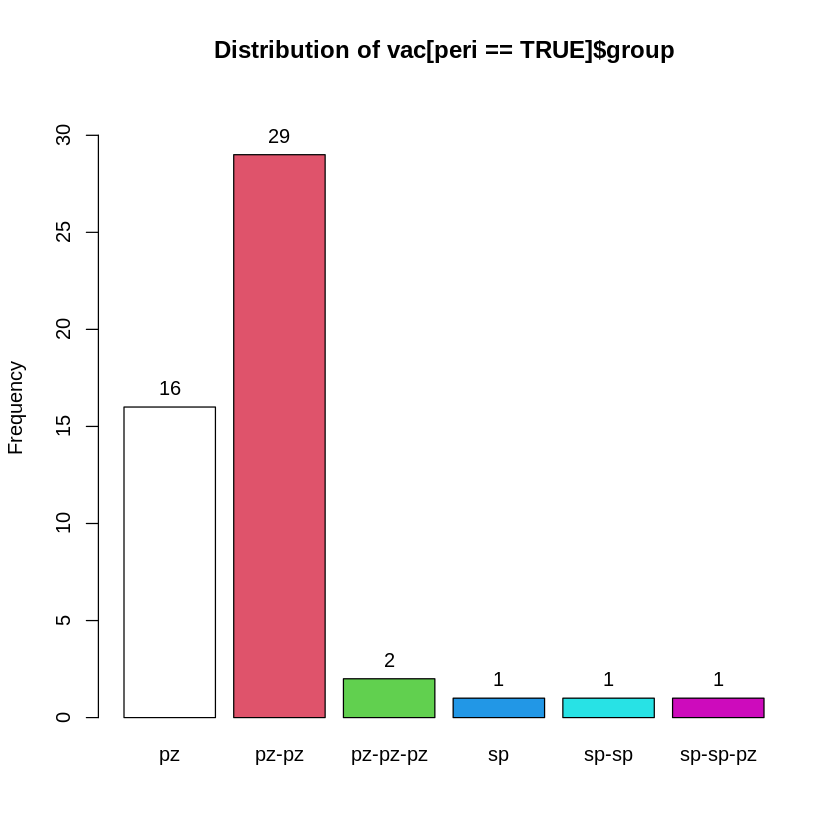

In [ ]:
tab1(vac[peri==TRUE]$group)

In [ ]:
tableStack(sex:deathdc,by=group,data=vac[peri==TRUE & group %in% c("pz","pz-pz")])

              pz             pz-pz     Test stat.             P value
Total         16             29                                      
                                                                     
sex                                    Fisher's exact test    0.65   
   Female     3 (18.8)       3 (10.3)                                
   Male       13 (81.2)      26 (89.7)                               
                                                                     
age_y                                  t-test  (43 df) = 0.23 0.822  
  mean(SD)    14.8 (2.8)     14.6 (2)                                
                                                                     
age                                    Fisher's exact test    0.121  
   5-11       1 (6.2)        0 (0)                                   
   12-17      14 (87.5)      29 (100)                                
   18-40      1 (6.2)        0 (0)                                   
                    

In [ ]:
vac[peri==TRUE & group == "pz-pz-pz"]

genid,myo,peri,sex,age_y,age,inter,inter_g,los,deathdc,group
<int>,<lgl>,<lgl>,<chr>,<int>,<fct>,<dbl>,<fct>,<dbl>,<chr>,<chr>
257,FALSE,TRUE,Male,16,12-17,7,2-7,5,Alive,pz-pz-pz
258,FALSE,TRUE,Male,14,12-17,2,2-7,2,Alive,pz-pz-pz


In [ ]:
vac[peri==TRUE & group == "sp"]

genid,myo,peri,sex,age_y,age,inter,inter_g,los,deathdc,group
<int>,<lgl>,<lgl>,<chr>,<int>,<fct>,<dbl>,<fct>,<dbl>,<chr>,<chr>
1,TRUE,TRUE,Male,23,18-40,9,8-30,18,Alive,sp


In [ ]:
vac[peri==TRUE & group == "sp-sp"]

genid,myo,peri,sex,age_y,age,inter,inter_g,los,deathdc,group
<int>,<lgl>,<lgl>,<chr>,<int>,<fct>,<dbl>,<fct>,<dbl>,<chr>,<chr>
79,FALSE,TRUE,Male,39,18-40,29,8-30,5,Alive,sp-sp


In [ ]:
vac[peri==TRUE & group == "sp-sp-pz"]

genid,myo,peri,sex,age_y,age,inter,inter_g,los,deathdc,group
<int>,<lgl>,<lgl>,<chr>,<int>,<fct>,<dbl>,<fct>,<dbl>,<chr>,<chr>
254,FALSE,TRUE,Male,23,18-40,10,8-30,5,Alive,sp-sp-pz


In [ ]:
round(by(vac[peri==TRUE]$age_y,vac[peri==TRUE]$group,mean),1)

vac[peri == TRUE]$group: pz
[1] 14.8
------------------------------------------------------------ 
vac[peri == TRUE]$group: pz-pz
[1] 14.6
------------------------------------------------------------ 
vac[peri == TRUE]$group: pz-pz-pz
[1] 15
------------------------------------------------------------ 
vac[peri == TRUE]$group: sp
[1] 23
------------------------------------------------------------ 
vac[peri == TRUE]$group: sp-sp
[1] 39
------------------------------------------------------------ 
vac[peri == TRUE]$group: sp-sp-pz
[1] 23

In [ ]:
round(by(vac[peri==TRUE]$age_y,vac[peri==TRUE]$group,sd),1)

vac[peri == TRUE]$group: pz
[1] 2.8
------------------------------------------------------------ 
vac[peri == TRUE]$group: pz-pz
[1] 2
------------------------------------------------------------ 
vac[peri == TRUE]$group: pz-pz-pz
[1] 1.4
------------------------------------------------------------ 
vac[peri == TRUE]$group: sp
[1] NA
------------------------------------------------------------ 
vac[peri == TRUE]$group: sp-sp
[1] NA
------------------------------------------------------------ 
vac[peri == TRUE]$group: sp-sp-pz
[1] NA

# **Visualization**

In [4]:
temp <- tempfile()
download.file("https://drive.usercontent.google.com/uc?id=1M9Cfo3hCOySYX3FrIgVIeE9Qai8yQxRj&authuser=0&export=download", temp)
ref1<-read_excel(temp)

In [5]:
ref1<-as.data.table(ref1)

In [6]:
options(repr.plot.width=12, repr.plot.height=9)

## **Homologous vaccination**

**Myocarditis following homologous vaccination**

Female

In [15]:
ref1_f<-ref1[status %in% c("PZ","PZ-PZ","PZ-PZ-PZ") & sex == "Female"]
ref1_f$age[ref1_f$age=="5-11"]<-"  5-11"
ref1_f$Age<-paste0(ref1_f$age," yr")
ref1_f$Age<-factor(ref1_f$Age,levels = c("  5-11 yr","12-17 yr","18-40 yr"))
ref1_f<- ref1_f %>% arrange(status,sex,Age)
ref1_f$Dose<-str_count(ref1_f$status,"PZ")

In [16]:
homo_myo_female_meta<-metainc(event.e=n_myo,
                     time.e=N,
                     event.c=n_myo_c,
                     time.c=N_c,
                     studlab=Age,
                     data=ref1_f,
                     sm="IRR",
                     incr = 0,
                     method ="MH",
                     method.incr = "only0",
                     byvar = Dose,
                     common = TRUE,
                     random = TRUE)

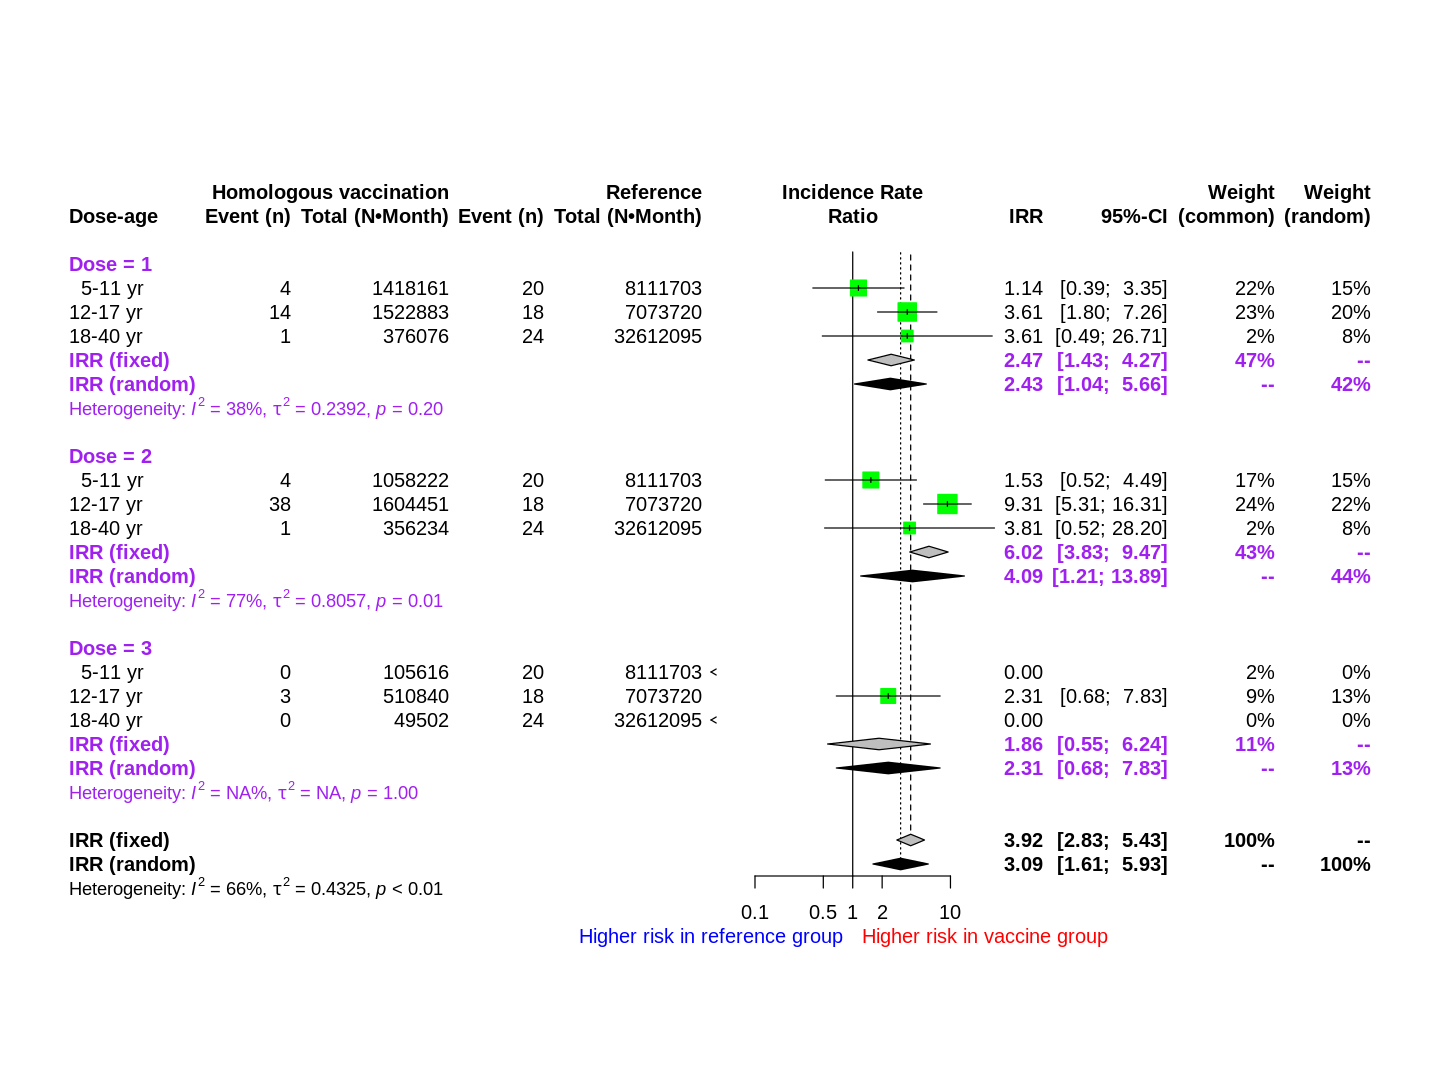

In [17]:
forest(homo_myo_female_meta,
       order = ref1_f$Age,
       col.square = "green",
       col.square.lines = "green",
       col.diamond.random = "black",
       col.diamond.lines.random = "black",
       allstudies = TRUE,
       text.common = "IRR (fixed)",
       text.random = "IRR (random)",
       leftlabs=c("Dose-age","Event (n)","Total (N•Month)","Event (n)","Total (N•Month)"),
       lab.e="Homologous vaccination",
       lab.c="Reference",
       label.right="Higher risk in vaccine group",
       col.label.right="red",
       label.left="Higher risk in reference group",
       col.label.left="blue",
       hetstat=TRUE,
       digits.mean=2,
       digits.sd=2,
       digits.weight = 0,
       weight.study = "random",
       overall = TRUE,
       col.by="purple",
       addrow.overall=TRUE,
       test.subgroup.common=FALSE,
       test.subgroup.random=FALSE)

Male

In [18]:
ref1_m<-ref1[ref1$status %in% c("PZ","PZ-PZ","PZ-PZ-PZ") & ref1$sex == "Male",]
ref1_m$Age<-paste0(ref1_m$age," yr")
ref1_m$Age[ref1_m$Age=="5-11 yr"]<-"  5-11 yr"
ref1_m$Age<-factor(ref1_m$Age,levels = c("  5-11 yr","12-17 yr","18-40 yr"))
ref1_m<- ref1_m%>% arrange(status,sex,Age)
ref1_m$Dose<-str_count(ref1_m$status,"PZ")

In [19]:
homo_myo_male_meta<-metainc(event.e=n_myo,
                     time.e=N,
                     event.c=n_myo_c,
                     time.c=N_c,
                     studlab=Age,
                     data=ref1_m,
                     sm="IRR",
                     incr = 0,
                     method ="MH",
                     method.incr = "only0",
                     byvar = Dose,
                     common = TRUE,
                     random = TRUE)

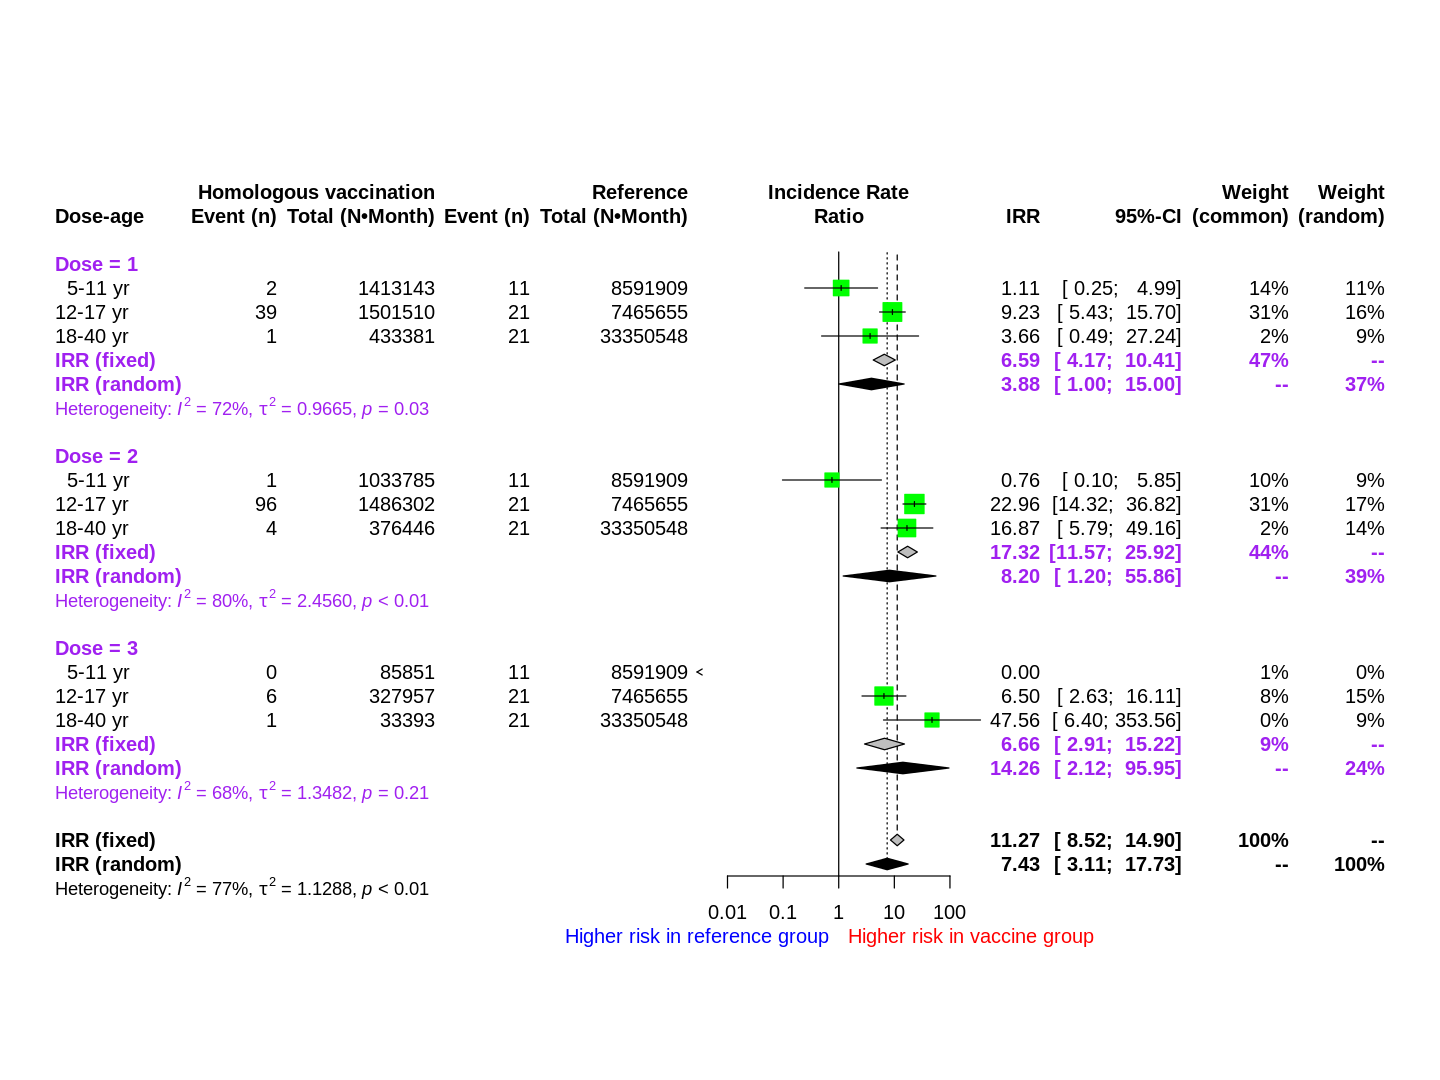

In [20]:
forest(homo_myo_male_meta,
       order = ref1_m$Age,
       col.square = "green",
       col.square.lines = "green",
       col.diamond.random = "black",
       col.diamond.lines.random = "black",
       allstudies = TRUE,
       text.common = "IRR (fixed)",
       text.random = "IRR (random)",
       leftlabs=c("Dose-age","Event (n)","Total (N•Month)","Event (n)","Total (N•Month)"),
       lab.e="Homologous vaccination",
       lab.c="Reference",
       label.right="Higher risk in vaccine group",
       col.label.right="red",
       label.left="Higher risk in reference group",
       col.label.left="blue",
       hetstat=TRUE,
       digits.mean=2,
       digits.sd=2,
       digits.weight = 0,
       weight.study = "random",
       overall = TRUE,
       col.by="purple",
       addrow.overall=TRUE,
       test.subgroup.common=FALSE,
       test.subgroup.random=FALSE)

**Pericarditis following homologous vaccination**

Female

In [21]:
ref1_f<-ref1[status %in% c("PZ","PZ-PZ","PZ-PZ-PZ") & sex == "Female"]
ref1_f$age[ref1_f$age=="5-11"]<-"  5-11"
ref1_f$Age<-paste0(ref1_f$age," yr")
ref1_f$Age<-factor(ref1_f$Age,levels = c("  5-11 yr","12-17 yr","18-40 yr"))
ref1_f<- ref1_f %>% arrange(status,sex,Age)
ref1_f<-ref1_f[ref1_f$n_peri!= 0 & ref1_f$n_peri_c != 0,]
ref1_f$Dose<-str_count(ref1_f$status,"PZ")

In [22]:
homo_peri_female_meta<-metainc(event.e=n_peri,
                     time.e=N,
                     event.c=n_peri_c,
                     time.c=N_c,
                     studlab=Age,
                     data=ref1_f,
                     sm="IRR",
                     incr = 0,
                     method ="MH",
                     method.incr = "only0",
                     byvar = Dose,
                     common = TRUE,
                     random = FALSE)

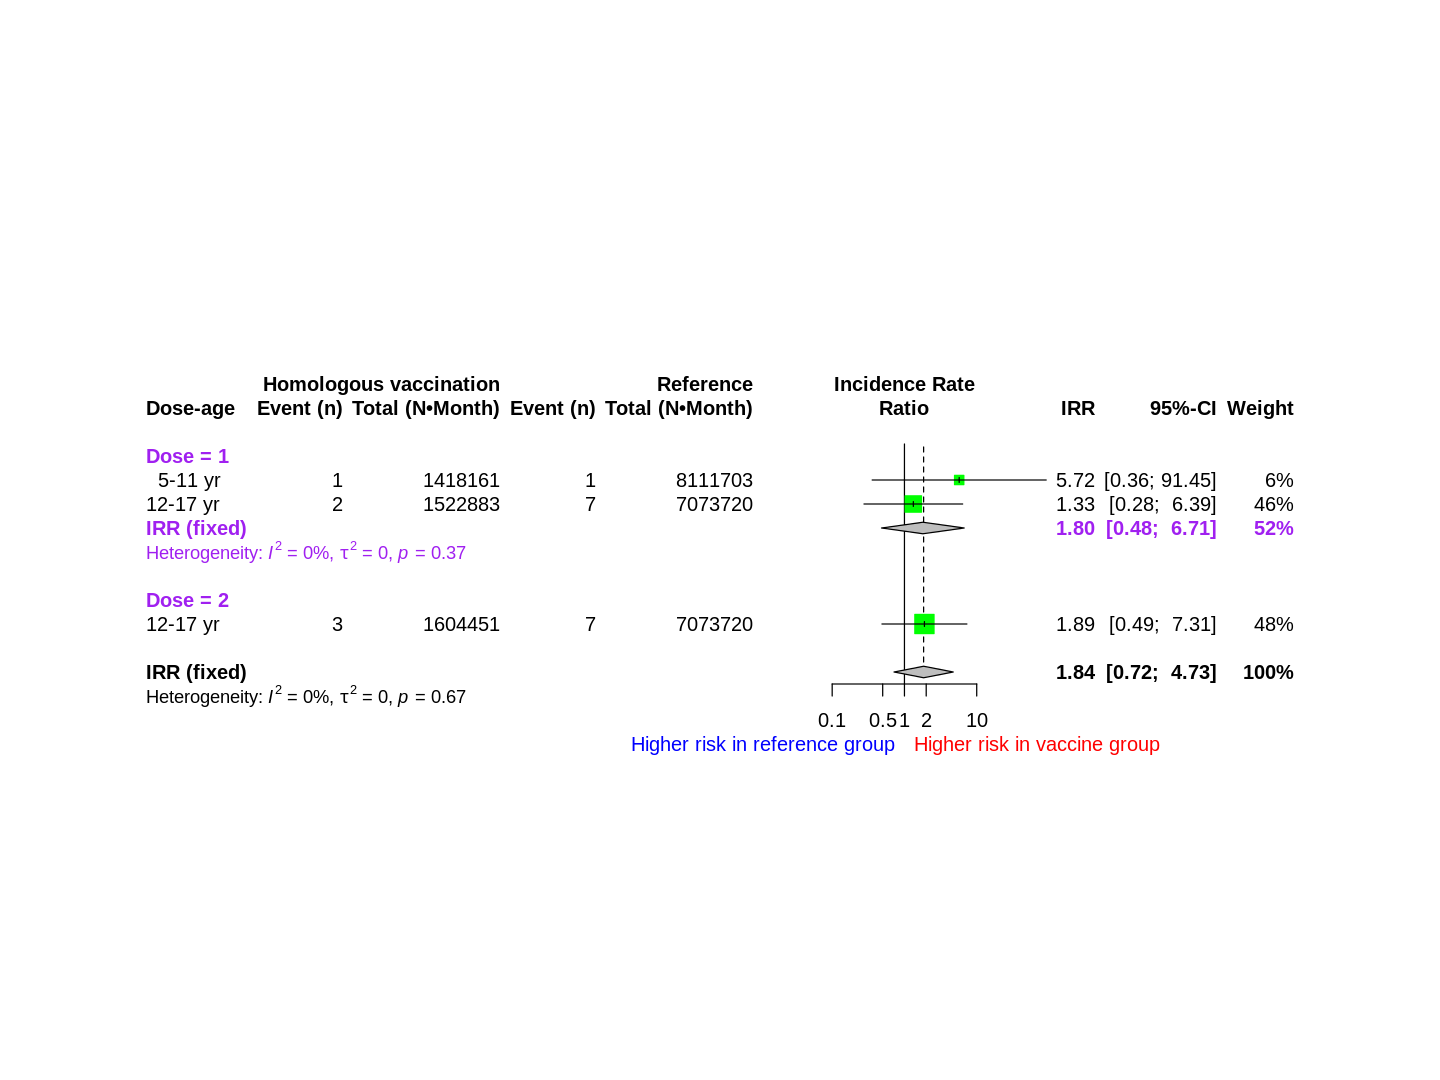

In [23]:
forest(homo_peri_female_meta,
       order = ref1_f$Age,
       col.square = "green",
       col.square.lines = "green",
       col.diamond.random = "black",
       col.diamond.lines.random = "black",
       allstudies = TRUE,
       text.common = "IRR (fixed)",
       leftlabs=c("Dose-age","Event (n)","Total (N•Month)","Event (n)","Total (N•Month)"),
       lab.e="Homologous vaccination",
       lab.c="Reference",
       label.right="Higher risk in vaccine group",
       col.label.right="red",
       label.left="Higher risk in reference group",
       col.label.left="blue",
       hetstat=TRUE,
       digits.mean=2,
       digits.sd=2,
       digits.weight = 0,
       weight.study = "random",
       overall = TRUE,
       col.by="purple",
       addrow.overall=TRUE,
       test.subgroup.common=FALSE,
       test.subgroup.random=FALSE)

Male

In [24]:
ref1_m<-ref1[ref1$status %in% c("PZ","PZ-PZ","PZ-PZ-PZ") & ref1$sex == "Male",]
ref1_m$Age<-paste0(ref1_m$age," yr")
ref1_m$Age[ref1_m$Age=="5-11 yr"]<-"  5-11 yr"
ref1_m$Age<-factor(ref1_m$Age,levels = c("  5-11 yr","12-17 yr","18-40 yr"))
ref1_m<- ref1_m%>% arrange(status,sex,Age)
ref1_m$Dose<-str_count(ref1_m$status,"PZ")

In [25]:
homo_peri_male_meta<-metainc(event.e=n_peri,
                     time.e=N,
                     event.c=n_peri_c,
                     time.c=N_c,
                     studlab=Age,
                     data=ref1_m,
                     sm="IRR",
                     incr = 0,
                     method ="MH",
                     method.incr = "only0",
                     byvar = Dose,
                     common = TRUE,
                     random = TRUE)

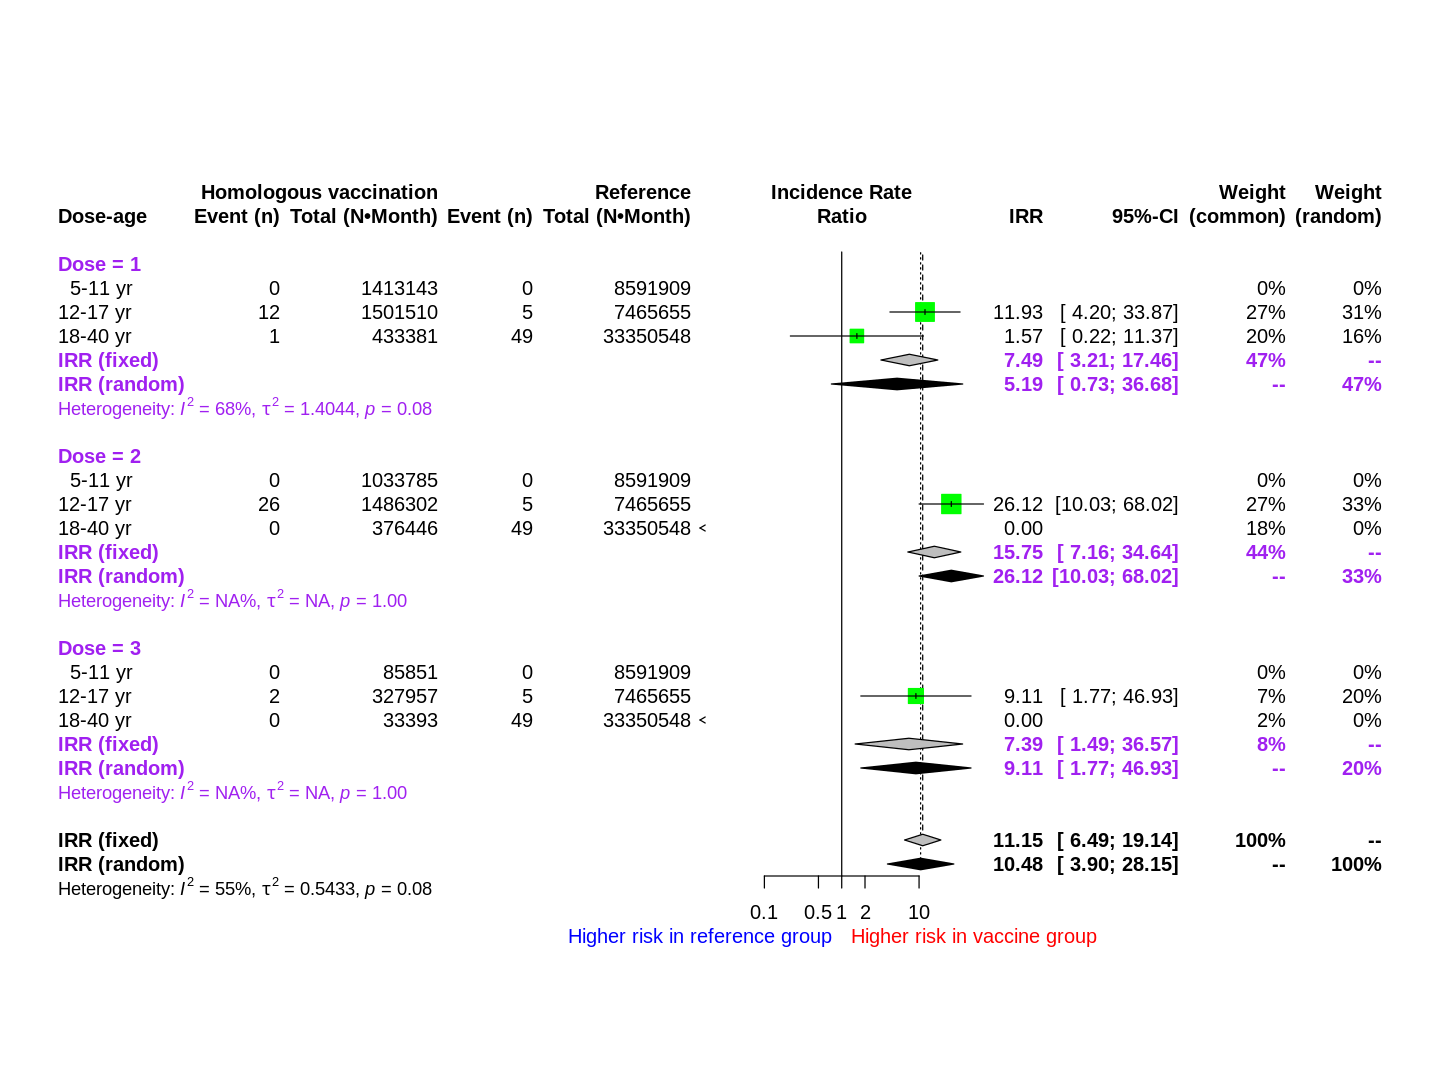

In [26]:
forest(homo_peri_male_meta,
       order = ref1_m$Age,
       col.square = "green",
       col.square.lines = "green",
       col.diamond.random = "black",
       col.diamond.lines.random = "black",
       allstudies = TRUE,
       text.common = "IRR (fixed)",
       text.random = "IRR (random)",
       leftlabs=c("Dose-age","Event (n)","Total (N•Month)","Event (n)","Total (N•Month)"),
       lab.e="Homologous vaccination",
       lab.c="Reference",
       label.right="Higher risk in vaccine group",
       col.label.right="red",
       label.left="Higher risk in reference group",
       col.label.left="blue",
       hetstat=TRUE,
       digits.mean=2,
       digits.sd=2,
       digits.weight = 0,
       weight.study = "random",
       overall = TRUE,
       col.by="purple",
       addrow.overall=TRUE,
       test.subgroup.common=FALSE,
       test.subgroup.random=FALSE)

## **Heterologous vaccination**

**Myocarditis following heterologous vaccination**

Female

In [27]:
ref1_f<-ref1[ref1$status %in% c("SP","SP-SP","SP-SP-PZ") & ref1$sex == "Female",]
ref1_f$age[ref1_f$age=="5-11"]<-"  5-11"
ref1_f$Age<-paste0(ref1_f$age," yr")
ref1_f$Age<-factor(ref1_f$Age,levels = c("  5-11 yr","12-17 yr","18-40 yr"))
ref1_f<- ref1_f%>% arrange(status,sex,Age)
ref1_f<-ref1_f[ref1_f$n_myo != 0 & ref1_f$n_myo_c != 0,]
ref1_f$Dose<-str_count(ref1_f$status,"-")+1

In [28]:
hetero_myo_female_meta<-metainc(event.e=n_myo,
                     time.e=N,
                     event.c=n_myo_c,
                     time.c=N_c,
                     studlab=Age,
                     data=ref1_f,
                     sm="IRR",
                     incr = 0,
                     method ="MH",
                     method.incr = "only0",
                     byvar = Dose,
                     common = TRUE,
                     random = TRUE)

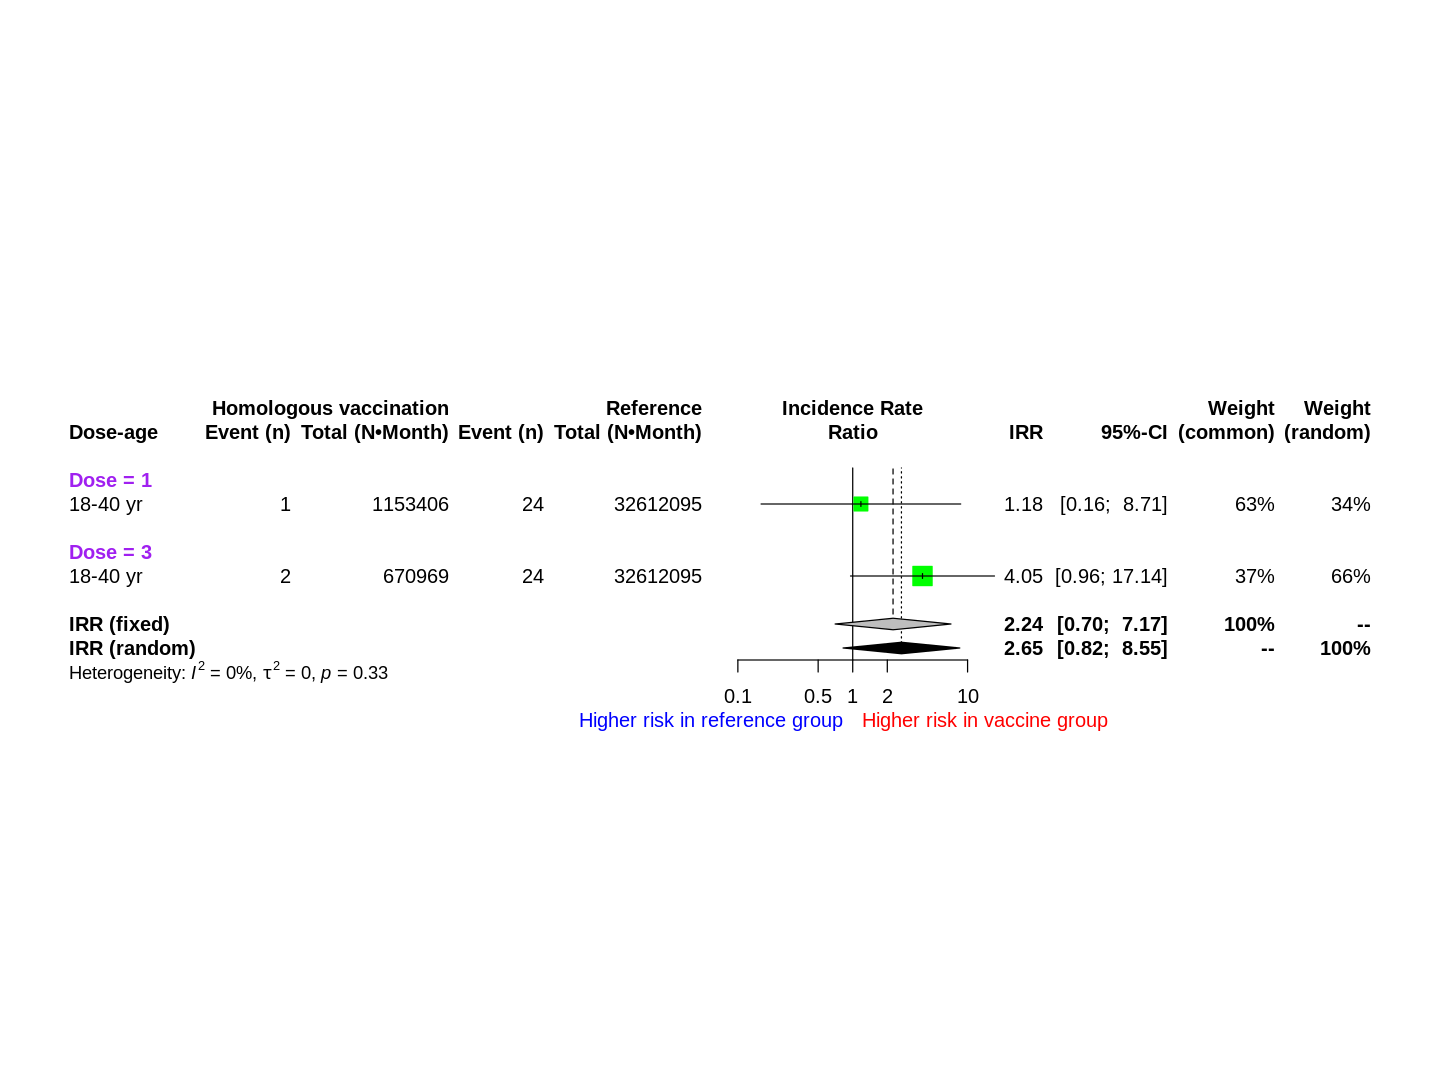

In [30]:
forest(hetero_myo_female_meta,
       order = ref1_f$Age,
       col.square = "green",
       col.square.lines = "green",
       col.diamond.random = "black",
       col.diamond.lines.random = "black",
       allstudies = TRUE,
       text.common = "IRR (fixed)",
       text.random = "IRR (random)",
       leftlabs=c("Dose-age","Event (n)","Total (N•Month)","Event (n)","Total (N•Month)"),
       lab.e="Homologous vaccination",
       lab.c="Reference",
       label.right="Higher risk in vaccine group",
       col.label.right="red",
       label.left="Higher risk in reference group",
       col.label.left="blue",
       hetstat=TRUE,
       digits.mean=2,
       digits.sd=2,
       digits.weight = 0,
       weight.study = "random",
       overall = TRUE,
       col.by="purple",
       addrow.overall=TRUE,
       test.subgroup.common=FALSE,
       test.subgroup.random=FALSE)

Male

In [31]:
ref1_m<-ref1[ref1$status %in% c("SP","SP-SP","SP-SP-PZ") & ref1$sex == "Male",]
ref1_m$Age<-paste0(ref1_m$age," yr")
ref1_m$Age[ref1_m$Age=="5-11 yr"]<-"  5-11 yr"
ref1_m$Age<-factor(ref1_m$Age,levels = c("  5-11 yr","12-17 yr","18-40 yr"))
ref1_m<- ref1_m%>% arrange(status,sex,Age)
ref1_m<-ref1_m[ref1_m$n_myo != 0 & ref1_m$n_myo_c != 0,]
ref1_m$Dose<-str_count(ref1_m$status,"-")+1

In [32]:
hetero_myo_male_meta<-metainc(event.e=n_myo,
                     time.e=N,
                     event.c=n_myo_c,
                     time.c=N_c,
                     studlab=Age,
                     data=ref1_m,
                     sm="IRR",
                     incr = 0,
                     method ="MH",
                     method.incr = "only0",
                     byvar = Dose,
                     common = TRUE,
                     random = TRUE)

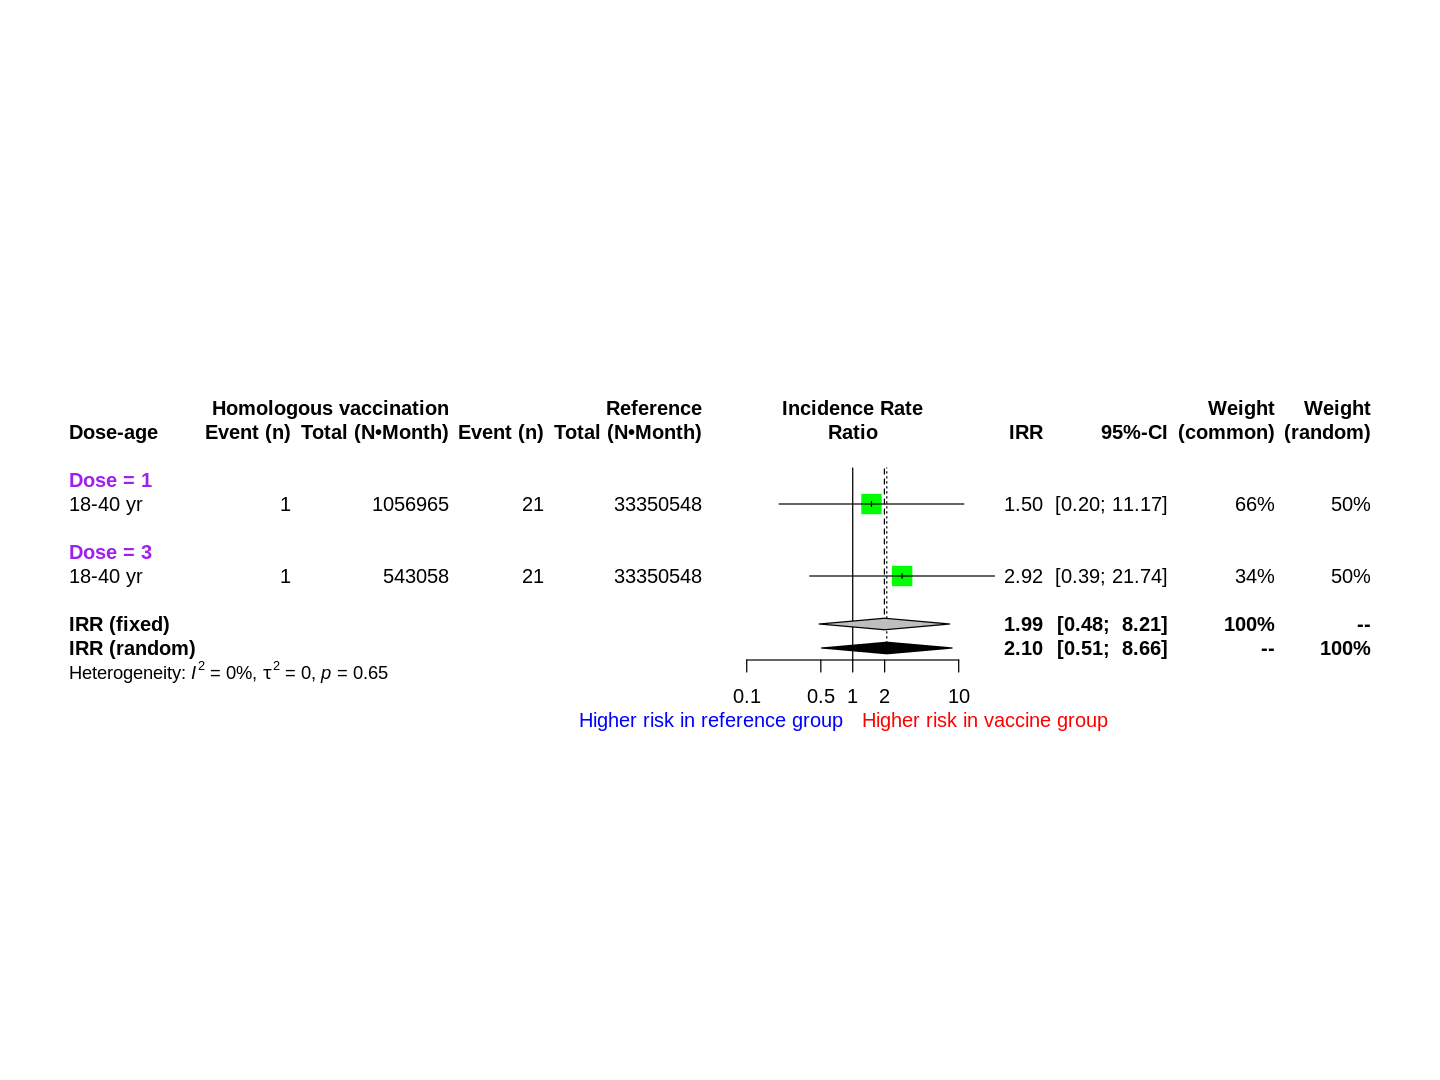

In [33]:
forest(hetero_myo_male_meta,
       order = ref1_m$Age,
       col.square = "green",
       col.square.lines = "green",
       col.diamond.random = "black",
       col.diamond.lines.random = "black",
       allstudies = TRUE,
       text.common = "IRR (fixed)",
       text.random = "IRR (random)",
       leftlabs=c("Dose-age","Event (n)","Total (N•Month)","Event (n)","Total (N•Month)"),
       lab.e="Homologous vaccination",
       lab.c="Reference",
       label.right="Higher risk in vaccine group",
       col.label.right="red",
       label.left="Higher risk in reference group",
       col.label.left="blue",
       hetstat=TRUE,
       digits.mean=2,
       digits.sd=2,
       digits.weight = 0,
       weight.study = "random",
       overall = TRUE,
       col.by="purple",
       addrow.overall=TRUE,
       test.subgroup.common=FALSE,
       test.subgroup.random=FALSE)

**Pericarditis following heterologous vaccination**

Female

In [34]:
ref1_f<-ref1[ref1$status %in% c("SP","SP-SP","SP-SP-PZ") & ref1$sex == "Female",]
ref1_f$age[ref1_f$age=="5-11"]<-"  5-11"
ref1_f$Age<-paste0(ref1_f$age," yr")
ref1_f$Age<-factor(ref1_f$Age,levels = c("  5-11 yr","12-17 yr","18-40 yr"))
ref1_f<- ref1_f%>% arrange(status,sex,Age)
ref1_f$Dose<-str_count(ref1_f$status,"-")+1

In [35]:
hetero_peri_female_meta<-metainc(event.e=n_peri,
                     time.e=N,
                     event.c=n_peri_c,
                     time.c=N_c,
                     studlab=Age,
                     data=ref1_f,
                     sm="IRR",
                     incr = 0,
                     method ="MH",
                     method.incr = "only0",
                     byvar = Dose,
                     common = TRUE,
                     random = TRUE)

!!! No event

ERROR: ignored

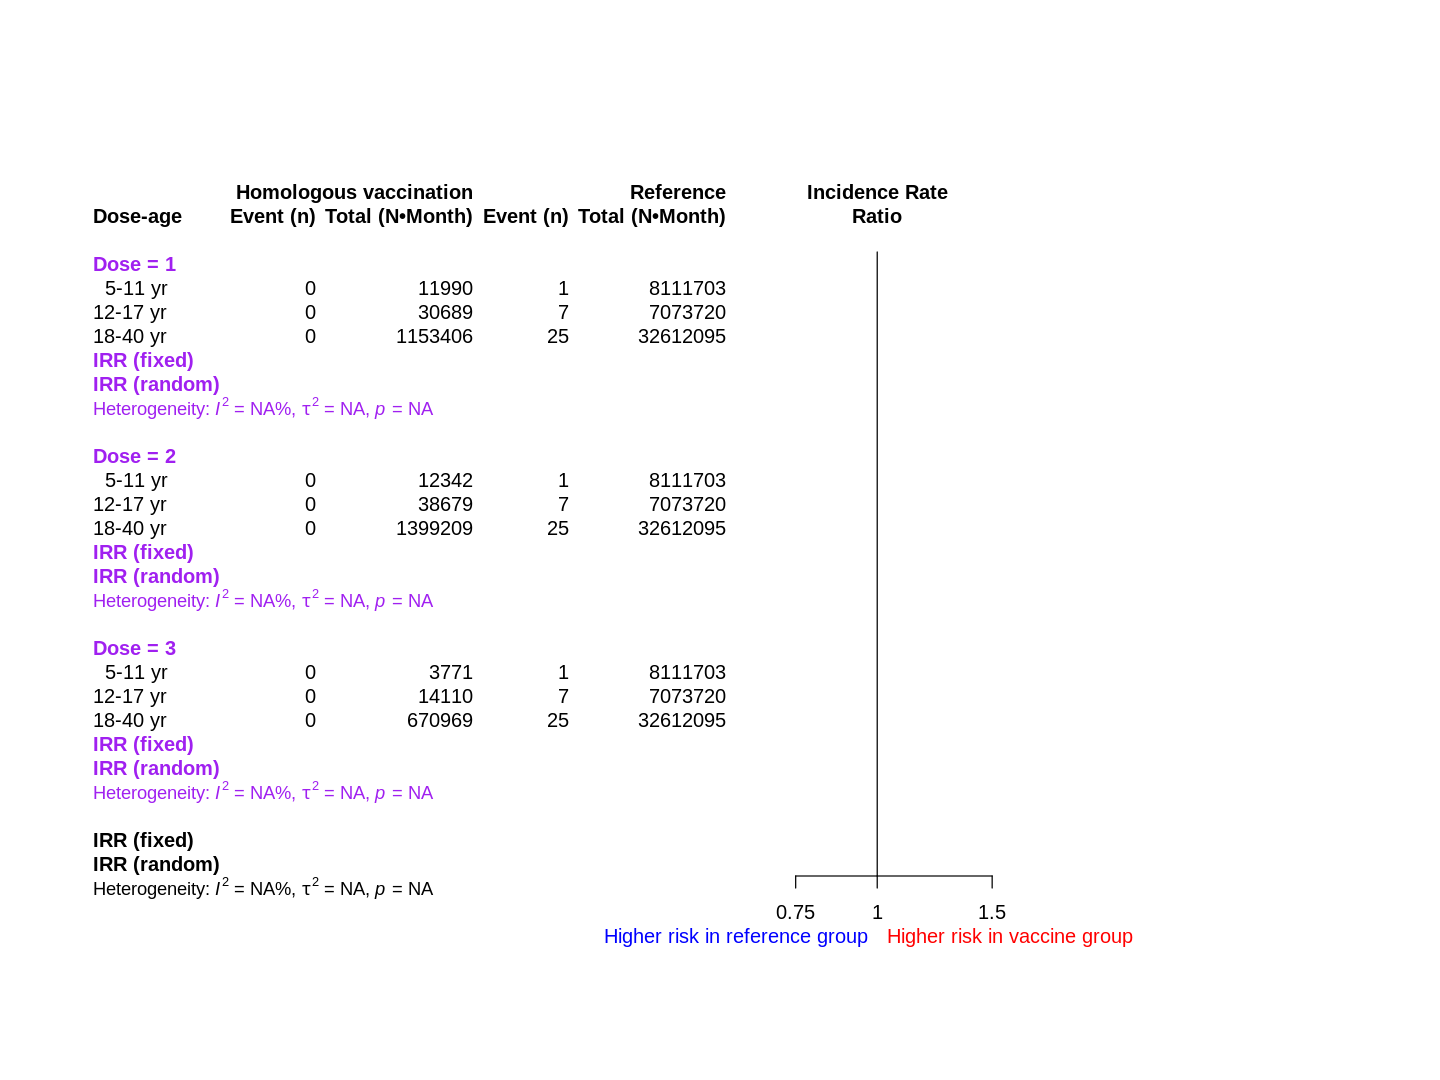

In [36]:
forest(hetero_peri_female_meta,
       order = ref1_m$Age,
       col.square = "green",
       col.square.lines = "green",
       col.diamond.random = "black",
       col.diamond.lines.random = "black",
       allstudies = TRUE,
       text.common = "IRR (fixed)",
       text.random = "IRR (random)",
       leftlabs=c("Dose-age","Event (n)","Total (N•Month)","Event (n)","Total (N•Month)"),
       lab.e="Homologous vaccination",
       lab.c="Reference",
       label.right="Higher risk in vaccine group",
       col.label.right="red",
       label.left="Higher risk in reference group",
       col.label.left="blue",
       hetstat=TRUE,
       digits.mean=2,
       digits.sd=2,
       digits.weight = 0,
       weight.study = "random",
       overall = TRUE,
       col.by="purple",
       addrow.overall=TRUE,
       test.subgroup.common=FALSE,
       test.subgroup.random=FALSE)

Male

In [37]:
ref1_m<-ref1[ref1$status %in% c("SP","SP-SP","SP-SP-PZ") & ref1$sex == "Male",]
ref1_m$Age<-paste0(ref1_m$age," yr")
ref1_m$Age[ref1_m$Age=="5-11 yr"]<-"  5-11 yr"
ref1_m$Age<-factor(ref1_m$Age,levels = c("  5-11 yr","12-17 yr","18-40 yr"))
ref1_m<- ref1_m%>% arrange(status,sex,Age)
ref1_m<-ref1_m[ref1_m$n_peri != 0 & ref1_m$n_peri_c != 0,]
ref1_m$Dose<-str_count(ref1_m$status,"-")+1

In [38]:
hetero_peri_male_meta<-metainc(event.e=n_peri,
                     time.e=N,
                     event.c=n_peri_c,
                     time.c=N_c,
                     studlab=Age,
                     data=ref1_m,
                     sm="IRR",
                     incr = 0,
                     method ="MH",
                     method.incr = "only0",
                     byvar = Dose,
                     common = TRUE,
                     random = TRUE)

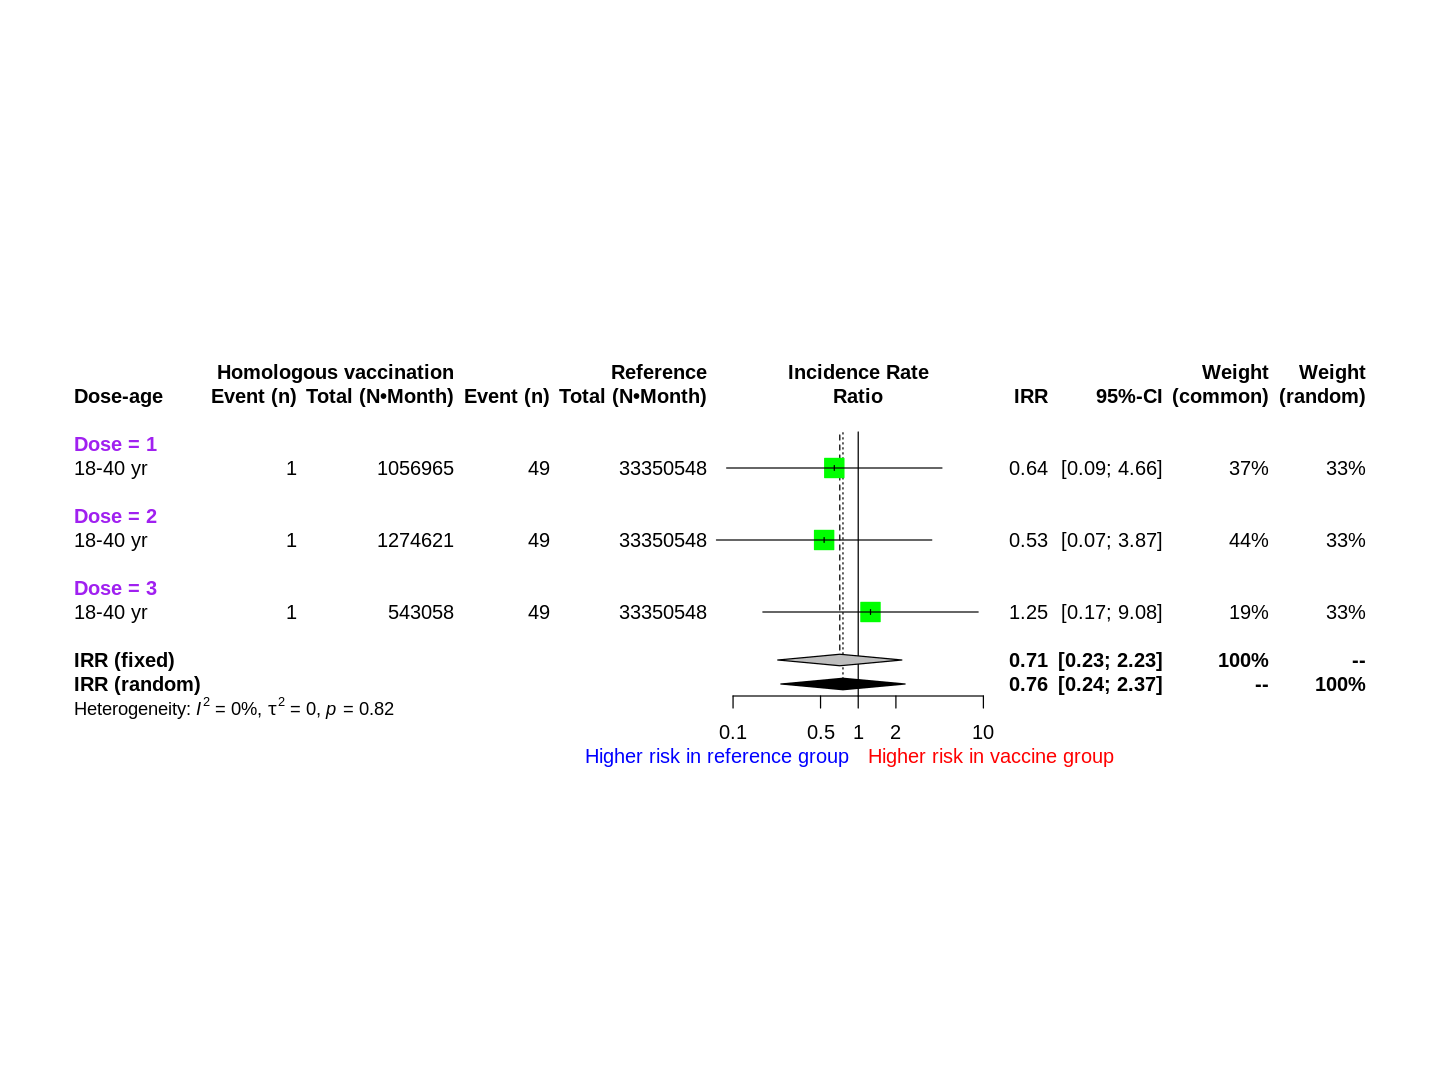

In [39]:
forest(hetero_peri_male_meta,
       order = ref1_m$Age,
       col.square = "green",
       col.square.lines = "green",
       col.diamond.random = "black",
       col.diamond.lines.random = "black",
       allstudies = TRUE,
       text.common = "IRR (fixed)",
       text.random = "IRR (random)",
       leftlabs=c("Dose-age","Event (n)","Total (N•Month)","Event (n)","Total (N•Month)"),
       lab.e="Homologous vaccination",
       lab.c="Reference",
       label.right="Higher risk in vaccine group",
       col.label.right="red",
       label.left="Higher risk in reference group",
       col.label.left="blue",
       hetstat=TRUE,
       digits.mean=2,
       digits.sd=2,
       digits.weight = 0,
       weight.study = "random",
       overall = TRUE,
       col.by="purple",
       addrow.overall=TRUE,
       test.subgroup.common=FALSE,
       test.subgroup.random=FALSE)

## **SARS-CoV-2 infection**

**Myocarditis following SARS-CoV-2 infection**

In [40]:
ref_inf<-ref1[ref1$status=="infected",]
ref_inf$age[ref_inf$age=="5-11"]<-"  5-11"
ref_inf$Age<-paste0(ref_inf$age," yr")
ref_inf$Age<-factor(ref_inf$Age,levels = c("  5-11 yr","12-17 yr","18-40 yr"))
ref_inf<- ref_inf%>% arrange(status,sex,Age)

In [41]:
myo_inf_meta<-metainc(event.e=n_myo,
                     time.e=N,
                     event.c=n_myo_c,
                     time.c=N_c,
                     studlab=Age,
                     data=ref_inf,
                     sm="IRR",
                     incr = 0,
                     method ="MH",
                     method.incr = "only0",
                     byvar = sex,
                     common = TRUE,
                     random = TRUE)

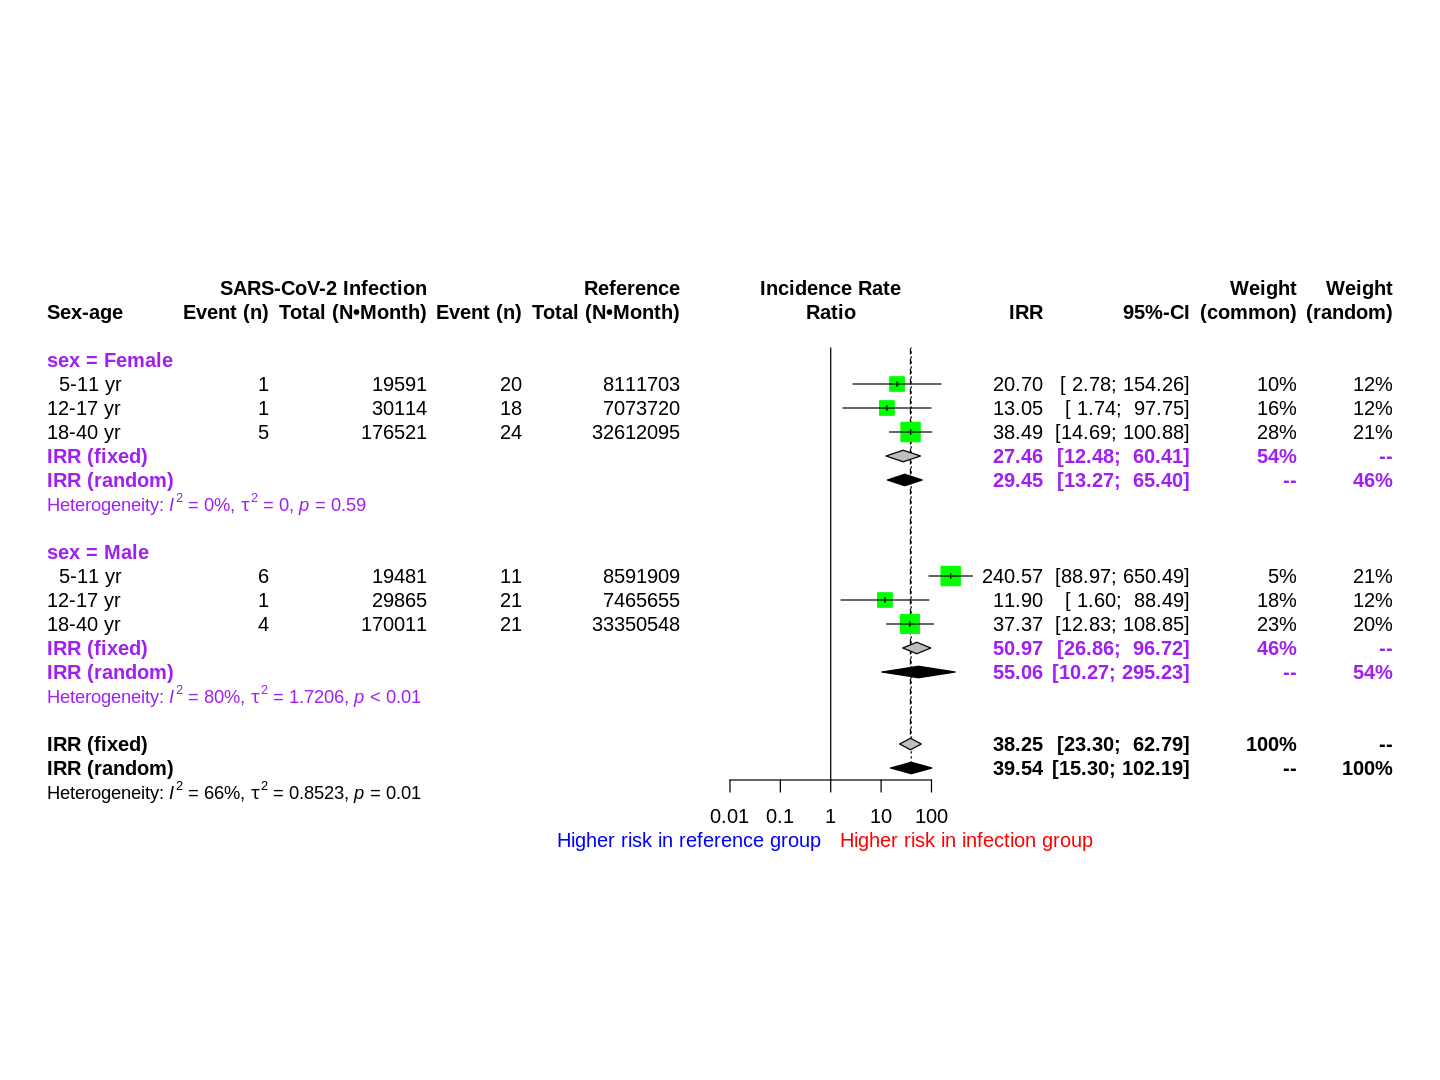

In [42]:
forest(myo_inf_meta,
       order = ref_inf$Age,
       col.square = "green",
       col.square.lines = "green",
       col.diamond.random = "black",
       col.diamond.lines.random = "black",
       allstudies = TRUE,
       text.common = "IRR (fixed)",
       text.random = "IRR (random)",
       leftlabs=c("Sex-age","Event (n)","Total (N•Month)","Event (n)","Total (N•Month)"),
       lab.e="SARS-CoV-2 Infection",
       lab.c="Reference",
       label.right="Higher risk in infection group",
       col.label.right="red",
       label.left="Higher risk in reference group",
       col.label.left="blue",
       hetstat=TRUE,
       digits.mean=2,
       digits.sd=2,
       digits.weight = 0,
       weight.study = "random",
       overall = TRUE,
       col.by="purple",
       addrow.overall=TRUE,
       test.subgroup.common=FALSE,
       test.subgroup.random=FALSE)

**Pericarditis following SARS-CoV-2 infection**

In [43]:
ref_inf<-ref1[ref1$status=="infected",]
ref_inf$age[ref_inf$age=="5-11"]<-"  5-11"
ref_inf$Age<-paste0(ref_inf$age," yr")
ref_inf$Age<-factor(ref_inf$Age,levels = c("  5-11 yr","12-17 yr","18-40 yr"))
ref_inf<- ref_inf%>% arrange(status,sex,Age)
ref_inf<-ref_inf[ref_inf$n_peri != 0 & ref_inf$n_peri_c != 0,]

In [44]:
peri_inf_meta<-metainc(event.e=n_peri,
                      time.e=N,
                      event.c=n_peri_c,
                      time.c=N_c,
                      studlab=Age,
                      data=ref_inf,
                      sm="IRR",
                      incr = 0,
                      method ="MH",
                      method.incr = "only0",
                      byvar = sex,
                      common = TRUE,
                      random = TRUE)

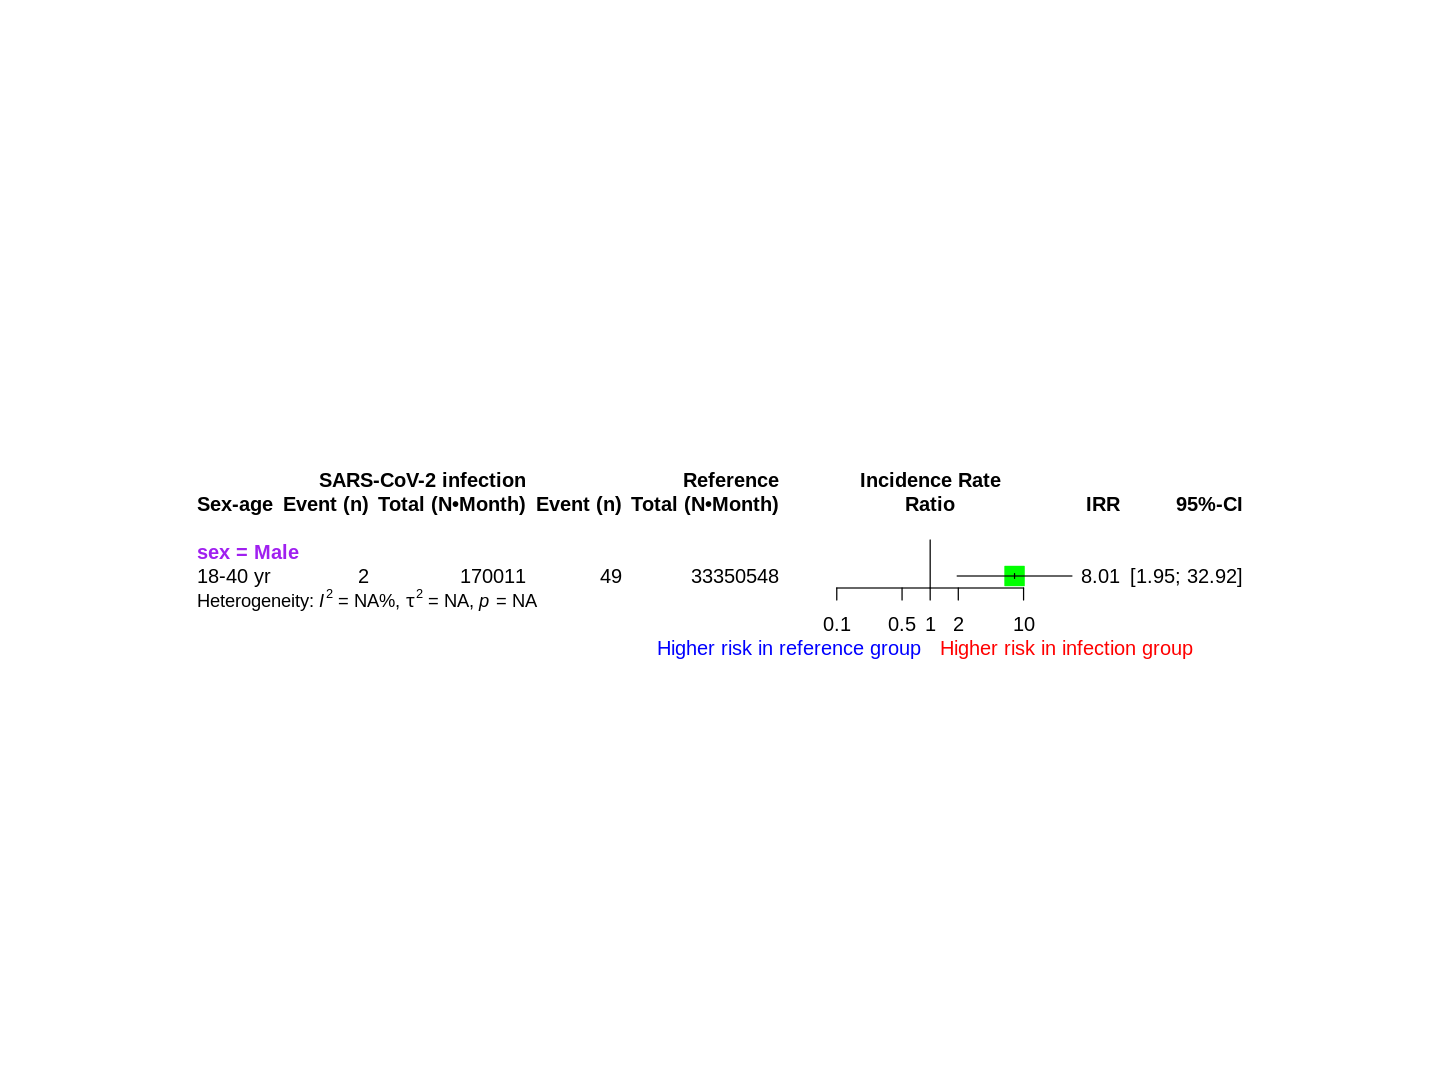

In [45]:
forest(peri_inf_meta,
       order = ref_inf$Age,
       col.square = "green",
       col.square.lines = "green",
       col.diamond.random = "black",
       col.diamond.lines.random = "black",
       allstudies = TRUE,
       text.common = "IRR (fixed)",
       text.random = "IRR (random)",
       leftlabs=c("Sex-age","Event (n)","Total (N•Month)","Event (n)","Total (N•Month)"),
       lab.e="SARS-CoV-2 infection",
       lab.c="Reference",
       label.right="Higher risk in infection group",
       col.label.right="red",
       label.left="Higher risk in reference group",
       col.label.left="blue",
       hetstat=TRUE,
       digits.mean=2,
       digits.sd=2,
       digits.weight = 0,
       weight.study = "random",
       overall = TRUE,
       col.by="purple",
       addrow.overall=TRUE,
       test.subgroup.common=FALSE,
       test.subgroup.random=FALSE)